# Regression in Prediction
**Course:** HUDK 4050, Week 5  
**Author:** Zecheng Chang. 
**Asignment:** ICE3  
**Objectives:**  
At the end of this ICE, I'll be able to:
1. build a simple linear regression model to fit data  
2. build a multiple regression model to fit data  
3. report the results of regression analysis  

## Linear Regression. 
### Simple Linear Regression
I will start with the most simple linear regression, a straight-line fit to the data  

y = $\alpha$ + bx  

Where $\alpha$ is the slope, and b is the intercept  

I'll illustrate this using an example from `ICE1_Data.csv`:

In [1]:
# import necessary modules
from sklearn.linear_model import LinearRegression 
# This is the module contains LR model
import pandas as pd 
import matplotlib.pyplot as plt

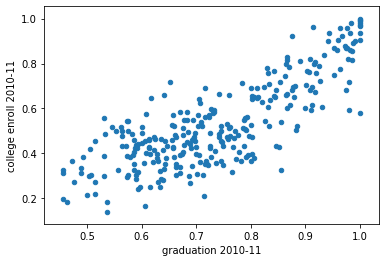

In [4]:
# import data
school = pd.read_csv("ICE1_Data.csv")
graduationCollege = school[['graduation 2010-11', 'college enroll 2010-11']].dropna()

graduation = graduationCollege.loc[:,"graduation 2010-11"].values.reshape(-1, 1)
college = graduationCollege.loc[:,"college enroll 2010-11"].values.reshape(-1, 1)

graduationCollege.plot.scatter(x = 'graduation 2010-11', y = 'college enroll 2010-11');

In [6]:
# fit the model
lr = LinearRegression()
lr.fit(graduation, college)
print("The intercept is: ", lr.intercept_)
print("The slope is: ", lr.coef_)

The intercept is:  [-0.27965123]
The slope is:  [[1.09914898]]


One unit of x increase, the y will increase 1.099

In [7]:
preds = lr.predict(graduation)

plot the regression line on the scatter plot

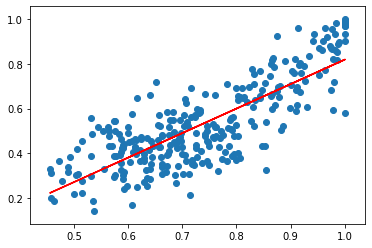

In [9]:
plt.scatter(graduation, college)
plt.plot(graduation, preds, color = 'red');

## Multipule Linear Regression

In [11]:
videoData = pd.read_csv("ICE3_data.csv")
videoData.head(3)

,stid,year,video,participation,watch.time,confusion.points,key.points
0,1,2018,A,1,16.5,6,6
1,2,2018,A,0,0.0,0,0
2,3,2018,A,1,9.0,4,6


In [13]:
videoData.describe()

,stid,year,participation,watch.time,confusion.points,key.points
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,30.500000,2018.500000,0.743333,9.302500,4.426667,2.326667
std,17.347038,0.500835,0.437524,8.396475,3.606658,1.921526
min,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,2018.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,2018.500000,1.000000,8.375000,5.000000,2.000000
75%,45.250000,2019.000000,1.000000,15.750000,8.000000,4.000000
max,60.000000,2019.000000,1.000000,32.500000,13.000000,7.000000


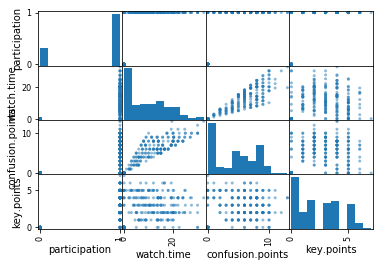

In [16]:
pd.plotting.scatter_matrix(videoData.iloc[:,3:]);

From the scatter plot, it looks like watch time, confusion points, as well as key points are all not quite normal, we need transform them.  

In [49]:
# first take a look of the data when participation is 0
videoData[videoData['participation'] == 0]['watch.time'].unique()

array([0.])

In [66]:
videoData[videoData['confusion.points'] == 0]['watch.time'].unique()

array([0.])

In [68]:
videoData[videoData['key.points'] == 0]['watch.time'].value_counts()

0.0     77
30.0     2
22.5     1
13.5     1
20.0     1
9.0      1
16.5     1
5.0      1
14.0     1
Name: watch.time, dtype: int64

We can see that when participation == 0,  watch.time is 0. this makes sense because when
a student doesn't open video, there won't be any watch time, so `participation` won't help
us to make prediction  
Also, when `confusion.points` == 0, watch.time is 0, so we can just remove observations with
`confusion.points` == 0  
Moreover, when `key.points` is 0, most of the values of watch.time is 0 too, we can remove them too.  

Another reason to remove them is 0s are not good for transformation

I consider to use box-cox transformation, however, there are 0s in these 2 varaibles
we need to get rid of 0 in order to perform box-cox. I'll add a very small number

In [122]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

In [130]:
videoData_new = videoData[['confusion.points','key.points','watch.time']]
videoData_new = videoData_new[(videoData_new['confusion.points'] != 0) & (videoData_new['key.points'] != 0)]

In [131]:
bc = PowerTransformer(method="box-cox")
mms = MinMaxScaler()
videoData_new = bc.fit_transform(videoData_new)
videoData_new = mms.fit_transform(videoData_new)
videoData_new = pd.DataFrame(videoData_new)

In [132]:
videoData_new

,0,1,2
0,0.424631,1.000000,0.627373
1,0.257105,1.000000,0.397057
2,0.590444,0.835120,0.718853
3,0.590444,0.835120,0.496446
4,0.341123,0.659022,0.585653
...,...,...,...
196,0.672857,0.467753,0.542110
197,0.672857,0.253965,0.542110
198,0.424631,0.253965,0.496446
199,0.754993,0.000000,0.654291


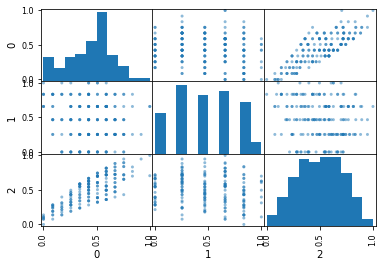

In [133]:
pd.plotting.scatter_matrix(videoData_new);

In [134]:
X = videoData_new.iloc[:,:2]
y = videoData_new.iloc[:,2:]

In [135]:
lr1 = LinearRegression()
lr1.fit(X,y)
print("The intercept is: ", lr1.intercept_)
print("The slope is: ", lr1.coef_)

The intercept is:  [0.16752947]
The slope is:  [[ 0.7896894  -0.02828313]]


In [136]:
import statsmodels.api as sm
videoModelOLS = sm.OLS(y, X)
videoModelOLSFit = videoModelOLS.fit()
print(videoModelOLSFit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      2   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              1482.
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                   2.95e-120
Time:                        13:25:39   Log-Likelihood:                          114.02
No. Observations:                 201   AIC:                                     -224.0
Df Residuals:                     199   BIC:                                     -217.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Now the whole linear regression is significant and each variable is significant as well.
R2 is 0.937

watch.time = transformed(`confusion.points`) * 0.9914 + transformed(`key.points`) * 0.0959

Unlike the linear regression povided by sklearn, the default linear regression model in statsmodel has  
no intercept